In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
metrics_path = "../run/dcm_test_5m/metrics.csv"

In [3]:
df = pd.read_csv(metrics_path)
df.drop(df.columns[-1], axis=1, inplace=True) # Remove final unnamed column

In [4]:
# Format data into data to plot
cols = df.columns
data = df.to_numpy()
x = np.arange(data.shape[0])

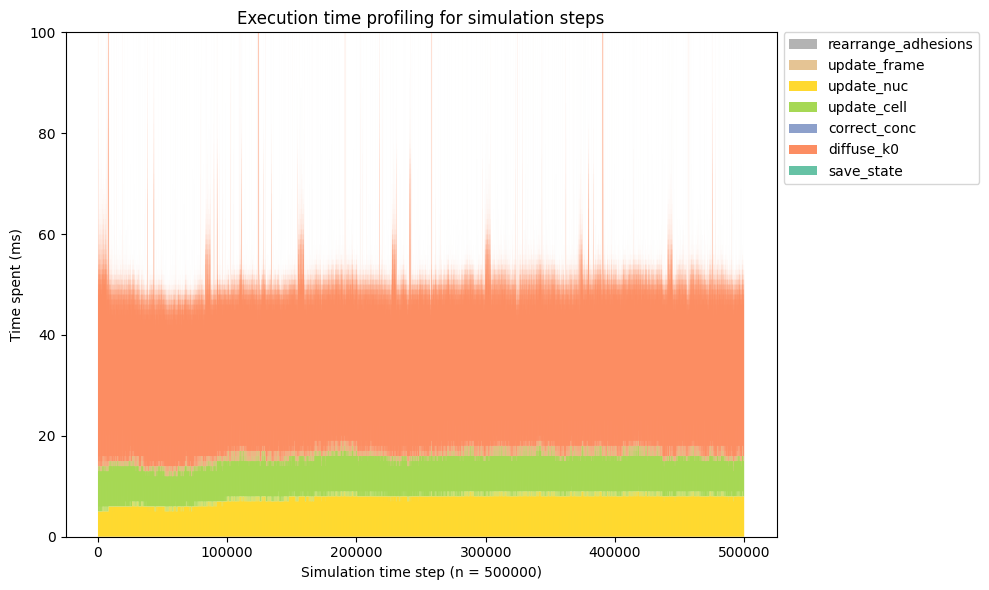

In [5]:
colors = plt.colormaps['Set2'](np.linspace(1, 0, len(cols)))

plt.figure(figsize=(10, 6))
plt.stackplot(x.T, data.T, labels=cols, colors=colors)
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("Time spent (ms)")
plt.xlabel(f"Simulation time step (n = {x.shape[0]})")
plt.title("Execution time profiling for simulation steps")
plt.tight_layout()
plt.show()

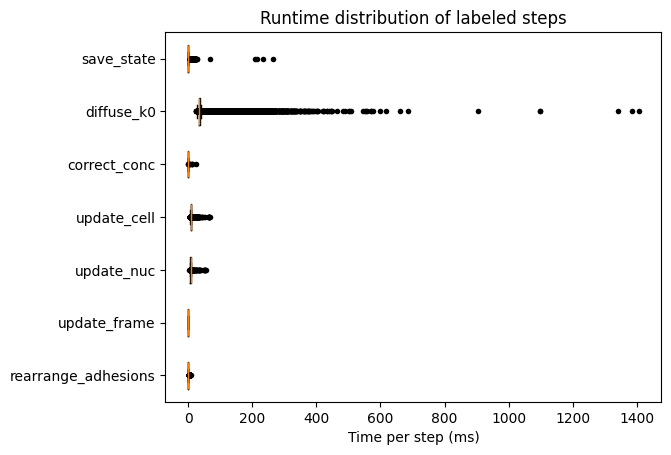

In [6]:
# Get all data points for the column
target_data = df.to_numpy()

custom_flierprops = dict(marker='o', markerfacecolor='black', markersize=4,
                         markeredgecolor='none')
plt.boxplot(target_data, tick_labels=list(df.columns), orientation='horizontal', flierprops=custom_flierprops)
plt.title("Runtime distribution of labeled steps")
plt.xlabel("Time per step (ms)")
plt.show()